In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import base64
import string
import re
from collections import Counter
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [2]:
filename= "/Users/laure/OneDrive/Dokumente/VU/Python for Text Analysis/Final Assignment/irony-labeled.csv"

df = pd.read_csv(filename)
df.head()

#Renaming the columns
df.columns = ["Comment_Text", "Label"]
df

,Comment_Text,Label
0,I suspect atheists are projecting their desire...,-1
1,It's funny how the arguments the shills are ma...,-1
2,We are truly following the patterns of how the...,-1
3,air pressure dropping as altitude goes higher....,-1
4,Absolutely. I think we'd be hard pressed to f...,-1
5,Democrats don't know how to manage money? Sh...,1
6,It's not like automation has eliminated the ne...,1
7,Would he win?,-1
8,Yeah I didn't get far. This article fills me ...,-1
9,Insane like a fox. Ted Cruz is actually very ...,1


In [3]:
#checking for any missing values
missing_data = df.isnull().sum()
missing_data

Comment_Text    0
Label           0
dtype: int64

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = df["Comment_Text"]
x = df["Label"]

#think this is the right way round.... !! 
#i.e. x = label, y = comment, but we may need to check haha

##double check and see top 5
# print(x.head())
# print(y.head())

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=0)

#pandas concat joins series together (i.e. dataframes)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
val = pd.concat([X_val, y_val], axis=1)

print(len(train)) #70
print(len(test))  #20
print(len(val))   #10



1364
390
195


In [7]:
##Indexing Training
# print("Comment_label:", train["Comment_Text"].iloc[:4])
# print("Label:", train["Label"].iloc[:4])

In [8]:
# pandas .shape to see data frame in form of tuples (no. of rows / cols)

print("Training Data Shape:", train.shape)
print("Testing Data Shape:", test.shape)
print("Validation Data Shape:", val.shape)

Training Data Shape: (1364, 2)
Testing Data Shape: (390, 2)
Validation Data Shape: (195, 2)


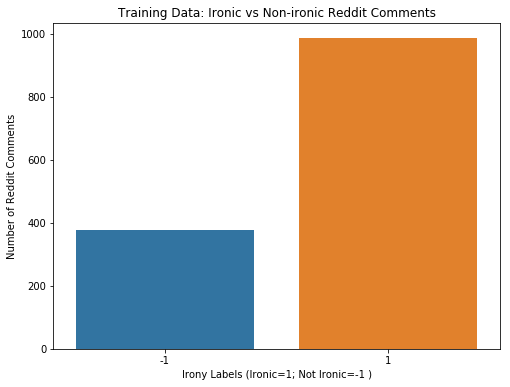

In [9]:
#Summarise the distribution of comments by different labels (1)Train, (2)Val (3)Test

#TRAINING
fig = plt.figure(figsize=(8,6))
sns.barplot(x = train["Label"].unique(), 
            y=train["Label"].value_counts())

plt.title("Training Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Ironic=1; Not Ironic=-1 )")
plt.show()

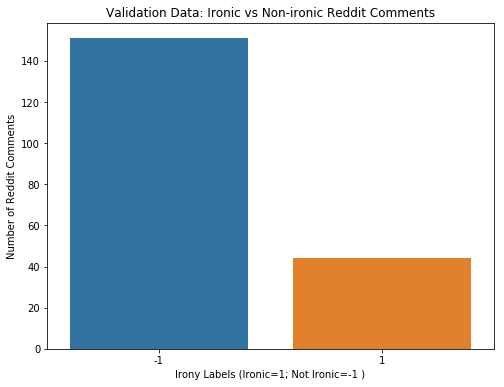

In [10]:
#VALIDATION
fig = plt.figure(figsize=(8,6))
sns.barplot(x = val["Label"].unique(), 
            y=val["Label"].value_counts())

plt.title("Validation Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Ironic=1; Not Ironic=-1 )")
plt.show()

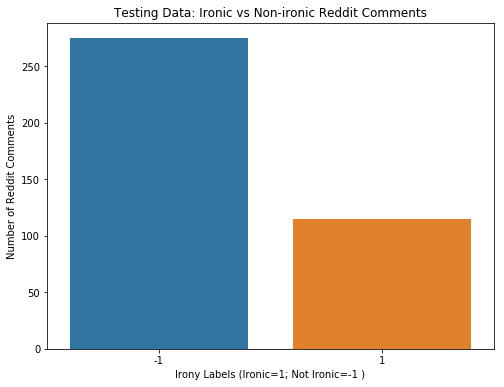

In [11]:
#TESTING
fig = plt.figure(figsize=(8,6))
sns.barplot(x = test["Label"].unique(), 
            y=test["Label"].value_counts())

plt.title("Testing Data: Ironic vs Non-ironic Reddit Comments")
plt.ylabel("Number of Reddit Comments")
plt.xlabel("Irony Labels (Ironic=1; Not Ironic=-1 )")
plt.show()

In [12]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [13]:
# #split comments into tokens and add additional column to dataframe
#APPLY SPACY NLP (make each a doc)
train["Comment_Text_Parsed"] = train["Comment_Text"].apply(lambda x: nlp(x)) 


#CODE below overwrites same column, above adds and extra column (choose one)

#train["Comment_Text"] = train["Comment_Text"].apply(lambda x: nlp(x)) 

In [21]:
train.head()

,Label,Comment_Text,Comment_Text_Parsed
488,1,She must have taken the Parsing Graduate Cours...,"(She, must, have, taken, the, Parsing, Graduat..."
586,-1,"""You will be abused. "" Heh heh.","("", You, will, be, abused, ., "", , Heh, heh, .)"
1925,1,I'm going to use this comment without giving c...,"(I, 'm, going, to, use, this, comment, without..."
1533,-1,"Bible says ""fear of man brings a trap"". \n\nYo...","(Bible, says, "", fear, of, man, brings, a, tra..."
1536,1,I saw you driving that car you filthy whore...,"(I, saw, you, driving, that, car, you, filthy,..."


# Okay so now was thinking to take each of the comments out of the dataframe and put into a list

Ofc we need to keep the comments all together still (make bag of words for each? but not entire thing)...

# so not sure if better to keep in dataframe and then we can just add on columns i.e. average word/sentence length for each etc

from this point on i don't know what im doing hahah

In [34]:
sub_train

NameError: name 'sub_train' is not defined

In [32]:
for row in train["Comment_Text_Parsed"]:
    x = row.text
print(x)
    #train["Number of words"] = len(comment)

#train

Is it just me, or is the idea of ANY judge, at any level, deciding any case before them based on there own personal viewpoints utterly ridiculous?  A judges decisions should be made entirely on the facts and arguments presented to them on a case by case basis.  The bench is not a place for judges to inject there own views, political or social or religious or anything.  Judges bought and paid for by either political party or big business is what is undermining the very principals this country was founded on and looks to be destroying any future this country has.


In [30]:
# #METHOD ONE (out of dataframe to list):
# xx = train['Comment_Text_Parsed'].values.tolist()
# gg = set()

# for x in xx:
#     gg.add(x)
# #     print(x, type(x), "\n")
# gg

{Nah instant 1950's tax rates.,
 I'm still protesting the teaching in schools of Heliocentrism as perpetrated by the convicted fraud and known huckster Galileo.  If Geocentrism was good enough for Jesus then it's good enough for me.,
 [deleted],
 I love how they at the end, they pull out a stuck Hummer.,
 Yep he had lots of flaws fortunately being a bad sci-fi writer wasn't one of them.,
 This guy is poisonous.  An idiot with barely passable video production skills.  Why the hell is anyone listening to his bullshit?,
 This is now officially my favorite novelty account.  [slow clap],
 If you're not Catholic it's unlikely you care what the Pope says.,
 Believe me, I was furious when our "socialist" (I can't roll my eyes at that hard enough) president took single payer off the table before anyone even had to ask him to take it off the table.  We should have nationalized healthcare like every other civilized nation on the planet, but apparently my fellow Americans just don't want it.  They

In [ ]:
#METHOD TWO:

# doc_comments_list = []
# for comment in train["Comment_Text"]:
#     doc_comments_list.append(comment)
    
# #each comment is now a DOC and has been put into a list - just to check:
# for comment in doc_comments_list:
#      print(comment, type(comment), "\n")

In [16]:
#this follows from taking OUT the dataframe

#average word length
# wordlist = []
# for comment in list_of_comments:
#     print(comment, type(comment)) 
#     leng = len(comment)
# #     wordlist.append(comment)
# # print(wordlist[:5])

# print(leng)



In [17]:
# xlist = []
# for comment in list_of_comments:
#     for sent in comment:
#         sent = sent.sents
#         len_sent = len(sent)
#         xlist.append(len_sent)

# total = sum(xlist)
# leng = len(xlist)

# average_sent_length = total / leng
# print(f"Average Sentence Length: {average_sent_length}") 

NameError: name 'list_of_comments' is not defined

In [ ]:
# for x in list_of_comments:
#     print(x, "\t", type(x) [0:5])

# # # sorted(doc, key=len, reverse=True)[0:5]

In [ ]:
# word length box
#         print(token)


#         word = token.text
#         print(word)
#         av_w_lengeth = sum(len(word) for word in x) / len(x)
#         print(f"Average Word Length: {average_word_length}")